In [1]:
# Author: Benge Johnathan C. 
# Data Obtained From: https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("covidData.csv")
df.rename(columns={'PATIENT_TYPE': 'HOSPITALIZED'}, inplace=True)
df.rename(columns={'HIPERTENSION': 'HYPERTENSION'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   HOSPITALIZED          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HYPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

# Raw Data Description
This dataset includes a large amount of anonymous patient data, featuring 21 distinct characteristics and 1,048,576 individual patients. The Boolean features utilize a binary system, with "1" indicating "yes" and "2" indicating "no". Values of "97" and "99" denote missing information.

- SEX
    - 1: Female
    - 2: Male 
- AGE
- CLASIFFICATION_FINAL
    - Covid test findings degrees
- HOSPITALIZED
    - PATIENT TYPE
        - type of care the patient received in the unit. 1 for returned home and 2 for hospital extended stay.
- PNUEMONIA
- PREGNANT
- DIABETES
- COPD
    - Chronic obstructive pulmonary disease
- ASTHMA 
- INMSUPR
    - Immunosuppressed
- HYPERTENSION
- CARDIOVASCULAR
    - Heart disease
- RENAL_CHRONIC
    - Chronic renal disease
- OTHER_DISEASE
    - Any other disease
- OBESITY
- TOBACCO
- USMR
    - Patient treated medical units of the first, second or third level.
- MEDICAL_UNIT
    - Type of facillity
- INTUBED
    - Patient was connected to the ventilator.F
- ICU 
    - Intensive Care Unit.
- DATE_DIED
    - '9999-99-99' if patient survived. 

In [2]:
# Remove collumns not necessary for predicting Hospitilization.
df = df.drop(columns=['PNEUMONIA', 'INTUBED', 'MEDICAL_UNIT', 'ICU', 'CLASIFFICATION_FINAL', 'DATE_DIED', 'USMER'], axis=1)

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into features and target
X = df.drop(columns=['HOSPITALIZED'])
y = df['HOSPITALIZED']

# Train a random forest classifier
model = RandomForestClassifier()
model.fit(X, y)

# Print the feature importance scores
importances = model.feature_importances_
feature_names = X.columns
for i, importance in enumerate(importances):
    print(f'{feature_names[i]}: {importance}')
    

SEX: 0.017261083139638207
AGE: 0.575521851733171
PREGNANT: 0.020061477911750395
DIABETES: 0.13780426079857336
COPD: 0.022030511876572616
ASTHMA: 0.008231576181123804
INMSUPR: 0.024914903789851926
HYPERTENSION: 0.07878945067483642
OTHER_DISEASE: 0.026993730276156164
CARDIOVASCULAR: 0.015916925896058
OBESITY: 0.01780812515313858
RENAL_CHRONIC: 0.04380169489633151
TOBACCO: 0.010864407672798062


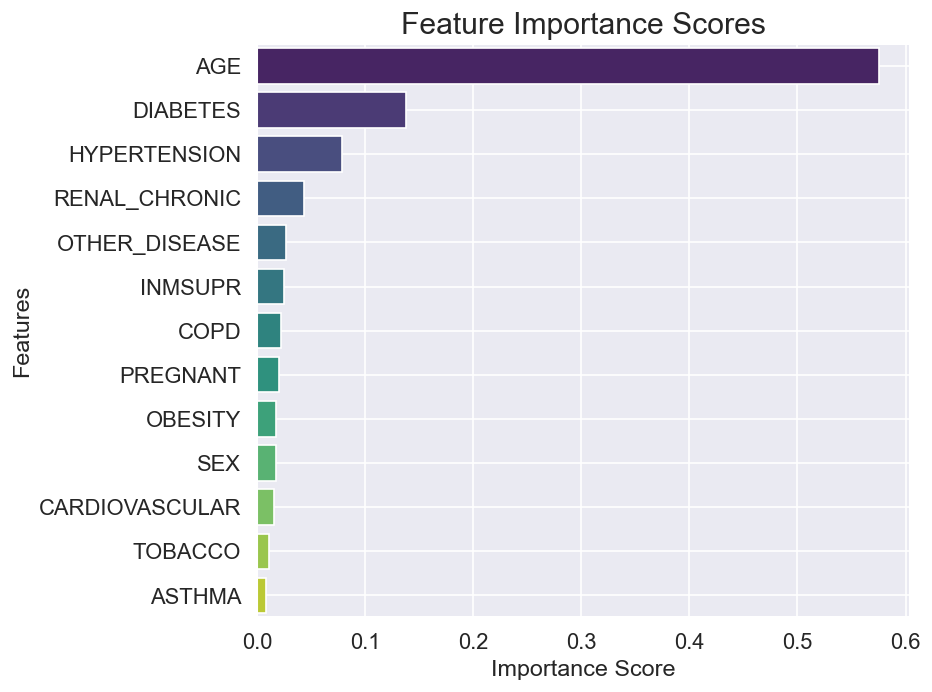

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the feature importance scores
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame of the feature importance scores
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values('importance', ascending=False)

# Set the figure size and font size
plt.figure(figsize=(8, 6), dpi=120)
sns.set(font_scale=1.2)

# Plot the feature importance scores as a bar plot
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis', errorbar=None)

# Add a title and axis labels
plt.title('Feature Importance Scores', fontsize=18)
plt.ylabel('Features', fontsize=14)
plt.xlabel('Importance Score', fontsize=14)

# Add a grid
plt.grid(True)

# Use a tight layout
plt.tight_layout()

# Show the plot
plt.show()

# Feature Importance Scores Determined via Random Forrest Calculator
### This visual shows the correlation between these features (x) and hospitalization (y) due to COVID19

In [5]:
# Create a list of bin edges
bins = [-1, 2, 4, 12, 19, 34, 49, 64, 122]

# Name the bins
bin_names = ['Infant', 'Toddler', 'Child', 'Teenager', 'Young Adult', 'Middle Aged', 'Pre Senior', 'Senior']

# Use pd.cut to create a new column with the binned data
df['age_bins'] = pd.cut(df['AGE'], bins, labels=bin_names)


# Data Binning for Data Simplification
Simplified for future training and visualizaitons

## Age Groups
- Infant: 0-2
- Toddler: 3-4 
- Child: 5-12
- Teenageer: 13-19
- Young Adult: 20-34
- Middle Aged: 35-49
- Pre Senior: 50-64
- Senior: 65+ 

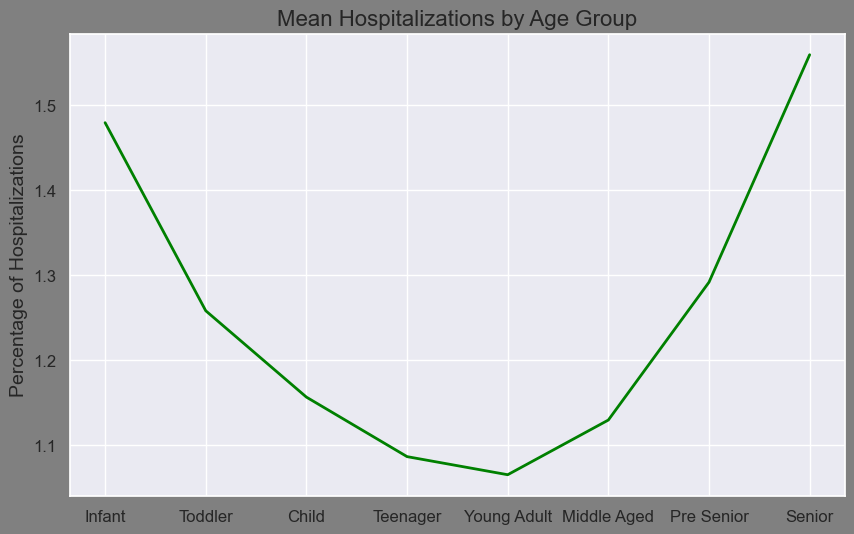

In [6]:
# Group the data by the age_bins column and calculate the mean number of hospitalizations for each bin
mean_hospitalized = df.groupby('age_bins')['HOSPITALIZED'].mean()

# Extract the age_bins and mean_hospitalized columns from the dataframe
age_bins = mean_hospitalized.index
hospitalized = mean_hospitalized.values

# Create a figure and set the size
fig = plt.figure(figsize=(10, 6))

# Create a line plot
plt.plot(age_bins, hospitalized, color='green', linewidth=2)

# Add a title and axis labels
plt.title('Mean Hospitalizations by Age Group', fontsize=16)
plt.ylabel('Percentage of Hospitalizations', fontsize=14)

# Set the tick marks and labels for the x-axis
plt.xticks(age_bins, age_bins, fontsize=12)

# Set the tick marks and labels for the y-axis
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(True)

# Set the background color
fig.set_facecolor('grey') 

# Show the plot
plt.show()


# Mean Hospitalization by Age Group
The visual above shows the difference in population percentage for the age groups to be hospitalized due to COVID19
- Teenager: 13-19
    - Most unlikely age group to be hospitalized
- Senior: 65+
    - Most likely to be hospitalized

In [7]:
# Data Simplification: Using top 7 important features to train model for efficiency.
#df = df.drop(columns=['COPD', 'TOBACCO', 'AGE', 'ASTHMA', 'INMSUPR', 'CARDIOVASCULAR', 'OTHER_DISEASE'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   SEX             1048575 non-null  int64   
 1   HOSPITALIZED    1048575 non-null  int64   
 2   AGE             1048575 non-null  int64   
 3   PREGNANT        1048575 non-null  int64   
 4   DIABETES        1048575 non-null  int64   
 5   COPD            1048575 non-null  int64   
 6   ASTHMA          1048575 non-null  int64   
 7   INMSUPR         1048575 non-null  int64   
 8   HYPERTENSION    1048575 non-null  int64   
 9   OTHER_DISEASE   1048575 non-null  int64   
 10  CARDIOVASCULAR  1048575 non-null  int64   
 11  OBESITY         1048575 non-null  int64   
 12  RENAL_CHRONIC   1048575 non-null  int64   
 13  TOBACCO         1048575 non-null  int64   
 14  age_bins        1048575 non-null  category
dtypes: category(1), int64(14)
memory usage: 113.0 MB


# Decided to add Columns Removed above back to the DF in order to increase accuracy.


In [8]:
# Show unique value amount for each feature
for i in df.columns:
   print(i,": ",len(df[i].unique()))

SEX :  2
HOSPITALIZED :  2
AGE :  121
PREGNANT :  4
DIABETES :  3
COPD :  3
ASTHMA :  3
INMSUPR :  3
HYPERTENSION :  3
OTHER_DISEASE :  3
CARDIOVASCULAR :  3
OBESITY :  3
RENAL_CHRONIC :  3
TOBACCO :  3
age_bins :  8


# Path Forward
In order to simplify this data it will be split into only binary features for ease and efficiency. 
Using binary features can help to prevent overfitting, especially when working with small or noisy datasets.
They are often more transparent and easier to interpret than more complex features.

## Data Overview (0, 1)
- is_male
- is_female
- is_female_pregnant
- is_hospitalized
- is_diabetic
- is_hypertensive
- is_obese
- is_kidney_diseased
- is_infant
- is_toddler
- is_child
- is_teenager
- is_young_adult
- is_middle_aged
- is_pre_senior
- is_senior

In [9]:
df.head()

,SEX,HOSPITALIZED,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,age_bins
0,1,1,65,2,2,2,2,2,1,2,2,2,2,2,Senior
1,2,1,72,97,2,2,2,2,1,2,2,1,1,2,Senior
2,2,2,55,97,1,2,2,2,2,2,2,2,2,2,Pre Senior
3,1,1,53,2,2,2,2,2,2,2,2,2,2,2,Pre Senior
4,2,1,68,97,1,2,2,2,1,2,2,2,2,2,Senior


In [10]:
# Adding column is_male and is_female 
df['is_male'] = df['SEX'].apply(lambda x: 1 if x == 2 else 0)
df['is_female'] = df['SEX'].apply(lambda x: 1 if x == 1 else 0)

# Removing 'SEX' column
df = df.drop(columns=['SEX'])

In [11]:
 # Replacing Columns and 1, 2 with 0, 1
 # Accounting for unkown values (97, 98 meaning unkown) and replacing with 2 to symbolize unknown 
df['is_female_pregnant'] = df['PREGNANT'].apply(lambda x: 1 if x == 1 else 0)
# hospitalized == 2 for extended stay 1 == outpatient 
df['is_hospitalized'] = df['HOSPITALIZED'].apply(lambda x: 1 if x == 2 else 0)
df['is_diabetic'] = df['DIABETES'].apply(lambda x: 1 if x == 1 else 0 if x == 2 else 2)
df['is_hypertensive'] = df['HYPERTENSION'].apply(lambda x: 1 if x == 1 else 0 if x == 2 else 2)
df['is_obese'] = df['OBESITY'].apply(lambda x: 1 if x == 1 else 0 if x == 2 else 2)
df['is_copd'] = df['COPD'].apply(lambda x: 1 if x == 1 else 0 if x == 2 else 2)
df['is_tobacco_user'] = df['TOBACCO'].apply(lambda x: 1 if x == 1 else 0 if x == 2 else 2)
df['is_heart_diseased'] = df['CARDIOVASCULAR'].apply(lambda x: 1 if x == 1 else 0 if x == 2 else 2)
df['is_immune_surpressed'] = df['INMSUPR'].apply(lambda x: 1 if x == 1 else 0 if x == 2 else 2)
df['is_other_diseased'] = df['OTHER_DISEASE'].apply(lambda x: 1 if x == 1 else 0 if x == 2 else 2)
df = df.drop(columns=['PREGNANT', 'HOSPITALIZED', 'DIABETES', 'HYPERTENSION', 'OBESITY','RENAL_CHRONIC', 'COPD', 'TOBACCO', 'ASTHMA', 'INMSUPR', 'CARDIOVASCULAR', 'OTHER_DISEASE'])
df.head()

,AGE,age_bins,is_male,is_female,is_female_pregnant,is_hospitalized,is_diabetic,is_hypertensive,is_obese,is_copd,is_tobacco_user,is_heart_diseased,is_immune_surpressed,is_other_diseased
0,65,Senior,0,1,0,0,0,1,0,0,0,0,0,0
1,72,Senior,1,0,0,0,0,1,1,0,0,0,0,0
2,55,Pre Senior,1,0,0,1,1,0,0,0,0,0,0,0
3,53,Pre Senior,0,1,0,0,0,0,0,0,0,0,0,0
4,68,Senior,1,0,0,0,1,1,0,0,0,0,0,0


In [12]:
# Create a new column for each age group and set its value based on the value in the 'age_bins' column
df['is_infant'] = df.apply(lambda row: 1 if row['age_bins'] == 'Infant' else 0, axis=1)
df['is_toddler'] = df.apply(lambda row: 1 if row['age_bins'] == 'Toddler' else 0, axis=1)
df['is_child'] = df.apply(lambda row: 1 if row['age_bins'] == 'Child' else 0, axis=1)
df['is_teenager'] = df.apply(lambda row: 1 if row['age_bins'] == 'Teenager' else 0, axis=1)
df['is_young_adult'] = df.apply(lambda row: 1 if row['age_bins'] == 'Young Adult' else 0, axis=1)
df['is_middle_aged'] = df.apply(lambda row: 1 if row['age_bins'] == 'Middle Aged' else 0, axis=1)
df['is_pre_senior'] = df.apply(lambda row: 1 if row['age_bins'] == 'Pre Senior' else 0, axis=1)
df['is_senior'] = df.apply(lambda row: 1 if row['age_bins'] == 'Senior' else 0, axis=1)
df = df.drop(columns=['age_bins'])

In [13]:
# Show unique value amount for each feature
for i in df.columns:
   print(i,": ",len(df[i].unique()))

AGE :  121
is_male :  2
is_female :  2
is_female_pregnant :  2
is_hospitalized :  2
is_diabetic :  3
is_hypertensive :  3
is_obese :  3
is_copd :  3
is_tobacco_user :  3
is_heart_diseased :  3
is_immune_surpressed :  3
is_other_diseased :  3
is_infant :  2
is_toddler :  2
is_child :  2
is_teenager :  2
is_young_adult :  2
is_middle_aged :  2
is_pre_senior :  2
is_senior :  2


### The Data is now *mostly* represented in a binary format. 

In [14]:
# Split the data into features and target
X = df.drop(columns=['is_hospitalized'])
y = df['is_hospitalized']

# Train a random forest classifier
model = RandomForestClassifier()
model.fit(X, y)

# Print the feature importance scores
importances = model.feature_importances_
feature_names = X.columns
for i, importance in enumerate(importances):
    print(f'{feature_names[i]}: {importance}')

AGE: 0.33494455306763876
is_male: 0.017268856900908364
is_female: 0.01698741948815899
is_female_pregnant: 0.006649359615496186
is_diabetic: 0.1354946744681188
is_hypertensive: 0.06656298357197678
is_obese: 0.020392172653381148
is_copd: 0.016804348627196628
is_tobacco_user: 0.0111883685423265
is_heart_diseased: 0.013487948884505035
is_immune_surpressed: 0.027685679167026113
is_other_diseased: 0.029856761907686463
is_infant: 0.020027980987555635
is_toddler: 0.0013651034638016276
is_child: 0.0015988559820462463
is_teenager: 0.003932541437766236
is_young_adult: 0.05225978330630813
is_middle_aged: 0.021401921241305064
is_pre_senior: 0.036165031922140205
is_senior: 0.16592565476465712


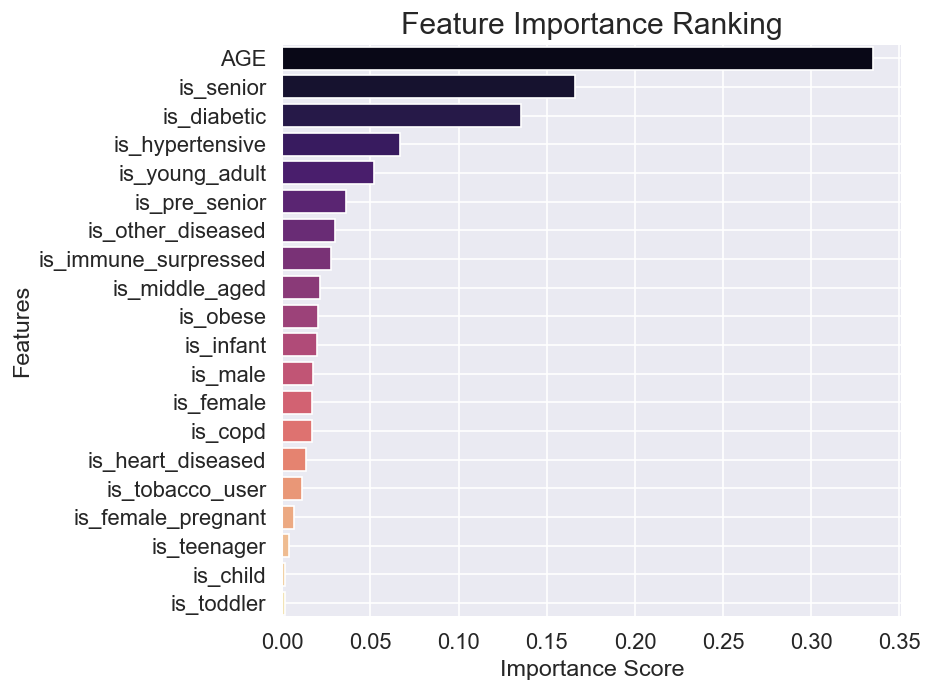

In [15]:
# Get the feature importance scores
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame of the feature importance scores
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values('importance', ascending=False)

# Set the figure size and font size
plt.figure(figsize=(8, 6), dpi=120)
sns.set(font_scale=1.2)

# Plot the feature importance scores as a bar plot
sns.barplot(x='importance', y='feature', data=importance_df, palette='magma', errorbar=None)

# Add a title and axis labels
plt.title('Feature Importance Ranking', fontsize=18)
plt.ylabel('Features', fontsize=14)
plt.xlabel('Importance Score', fontsize=14)

# Add a grid
plt.grid(True)

# Use a tight layout
plt.tight_layout()

# Show the plot
plt.show()

## Feature Importance Visualization after Data Prep

In [16]:
# Export Prepared Data to CSV
df.to_csv('prepData.csv', index=False)

In [17]:
# Drop columns where more than 2 fields are unknown
df = df.drop(df[(df == 2).sum(axis=1) > 2].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045547 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   AGE                   1045547 non-null  int64
 1   is_male               1045547 non-null  int64
 2   is_female             1045547 non-null  int64
 3   is_female_pregnant    1045547 non-null  int64
 4   is_hospitalized       1045547 non-null  int64
 5   is_diabetic           1045547 non-null  int64
 6   is_hypertensive       1045547 non-null  int64
 7   is_obese              1045547 non-null  int64
 8   is_copd               1045547 non-null  int64
 9   is_tobacco_user       1045547 non-null  int64
 10  is_heart_diseased     1045547 non-null  int64
 11  is_immune_surpressed  1045547 non-null  int64
 12  is_other_diseased     1045547 non-null  int64
 13  is_infant             1045547 non-null  int64
 14  is_toddler            1045547 non-null  int64
 15  is_child       

In [18]:
# Export Prepared Data to CSV
df.to_csv('prepData.csv', index=False)